In [1]:
# ================================
# 📦 Imports y configuración
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ruta del proyecto
PROJECT_ROOT = Path("..").resolve()
DATA_PATH = PROJECT_ROOT / "data"

print("Project root:", PROJECT_ROOT)
print("Data path:", DATA_PATH)


Project root: D:\Datos_Escritorio\Kranio\GitHub\kranio-split\kranio-data-science-project
Data path: D:\Datos_Escritorio\Kranio\GitHub\kranio-split\kranio-data-science-project\data


# Retail Sales Prediction — Exploratory Data Analysis (EDA)

## Objetivo
Analizar el comportamiento de clientes y ventas para entender
los factores que influyen en las ventas futuras y apoyar el
modelo de predicción.

Este análisis forma parte del pipeline de ML del proyecto.


In [2]:
file_path = DATA_PATH / "retail_sales_features.csv"

df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (5000, 13)


,customer_id,age,income,purchase_frequency,avg_ticket,recency_days,online_ratio,future_sales,annual_spend_est,activity_score,digital_score,customer_score,segment
0,1,56,58353.457443,11,58.722302,285,0.951013,402.149162,7751.343833,2.410959,0.951013,1.826980,Mid
1,2,69,67462.278860,7,56.573908,153,0.801525,418.461486,4752.208279,4.065753,0.801525,2.760062,Mid
2,3,46,54219.250087,14,55.370637,40,0.205749,749.016655,9302.266947,12.465753,0.205749,7.561752,Top
3,4,32,66306.787159,7,75.118287,26,0.391301,423.560829,6309.936127,6.501370,0.391301,4.057342,High
4,5,60,47034.133936,9,122.306864,273,0.927792,452.521689,13209.141353,2.268493,0.927792,1.732213,Mid


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   purchase_frequency  5000 non-null   int64  
 4   avg_ticket          5000 non-null   float64
 5   recency_days        5000 non-null   int64  
 6   online_ratio        5000 non-null   float64
 7   future_sales        5000 non-null   float64
 8   annual_spend_est    5000 non-null   float64
 9   activity_score      5000 non-null   float64
 10  digital_score       5000 non-null   float64
 11  customer_score      5000 non-null   float64
 12  segment             5000 non-null   object 
dtypes: float64(8), int64(4), object(1)
memory usage: 507.9+ KB


In [4]:
df.describe()


,customer_id,age,income,purchase_frequency,avg_ticket,recency_days,online_ratio,future_sales,annual_spend_est,activity_score,digital_score,customer_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.584600,59766.522875,9.999000,80.165532,181.028200,0.499224,439.963626,9621.146314,5.064124,0.499224,3.238164
std,1443.520003,14.919094,15046.386911,3.144611,20.170985,103.986805,0.287300,336.742896,3954.784054,3.433704,0.287300,2.062769
min,1.000000,18.000000,20000.000000,1.000000,11.168415,1.000000,0.000006,0.000000,474.831292,0.013699,0.000006,0.030009
25%,1250.750000,31.000000,49599.475777,8.000000,66.591279,91.000000,0.248171,192.597435,6751.013725,2.273973,0.248171,1.558523
50%,2500.500000,43.000000,59598.126830,10.000000,79.776107,184.000000,0.503580,363.378173,9152.903891,4.526027,0.503580,2.918808
75%,3750.250000,56.000000,69920.668751,12.000000,93.618173,269.000000,0.745094,621.837760,11976.150807,7.250685,0.745094,4.562415
max,5000.000000,69.000000,109145.990177,23.000000,156.134347,364.000000,0.999789,2718.991215,28689.252964,19.671233,0.999789,11.881553


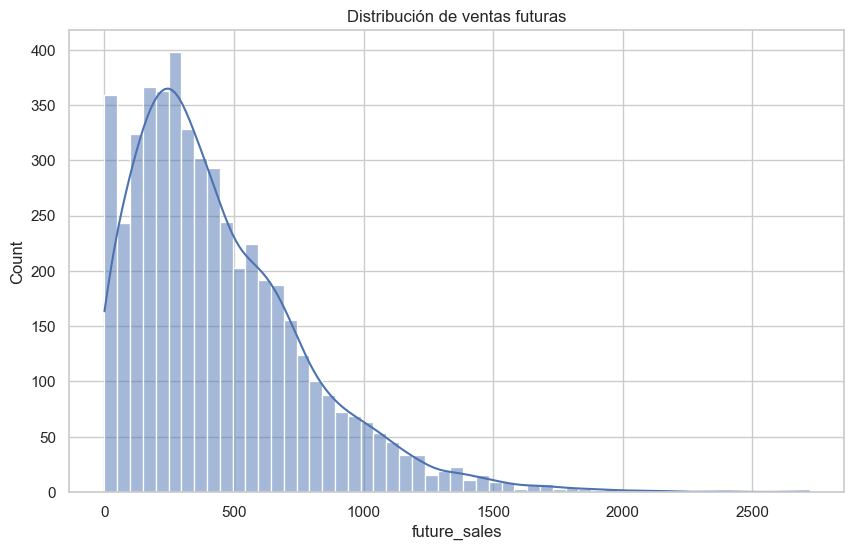

In [5]:
sns.histplot(df["future_sales"], kde=True)
plt.title("Distribución de ventas futuras")
plt.show()


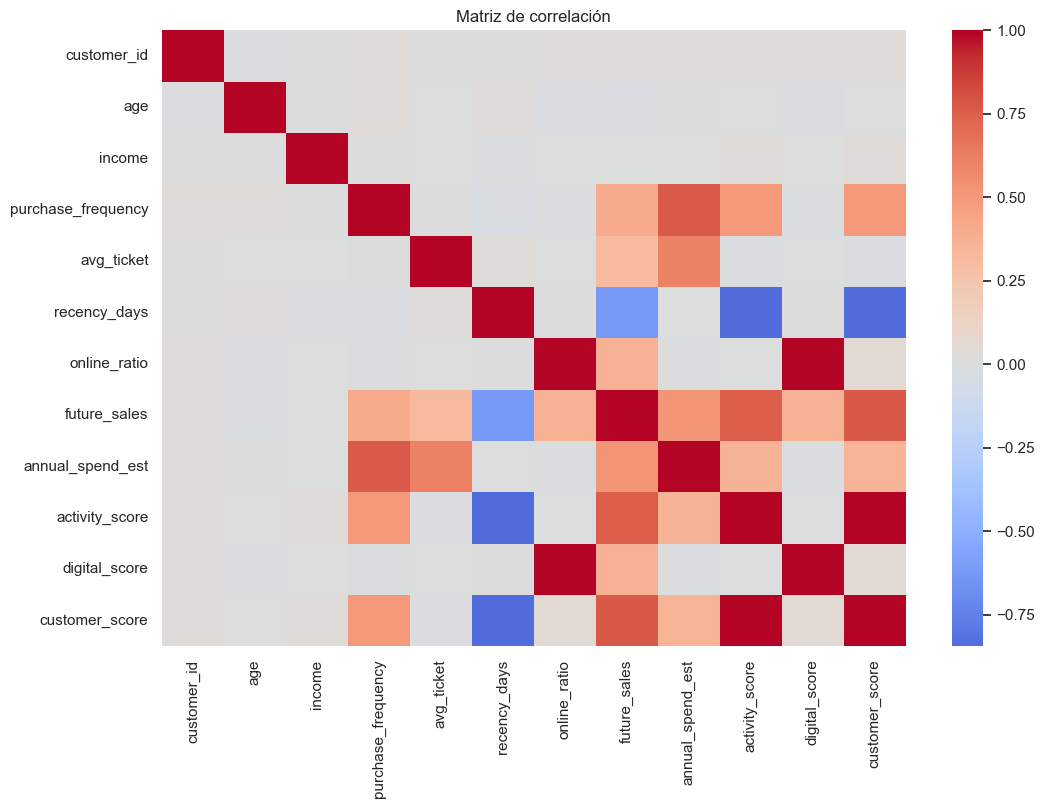

In [6]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


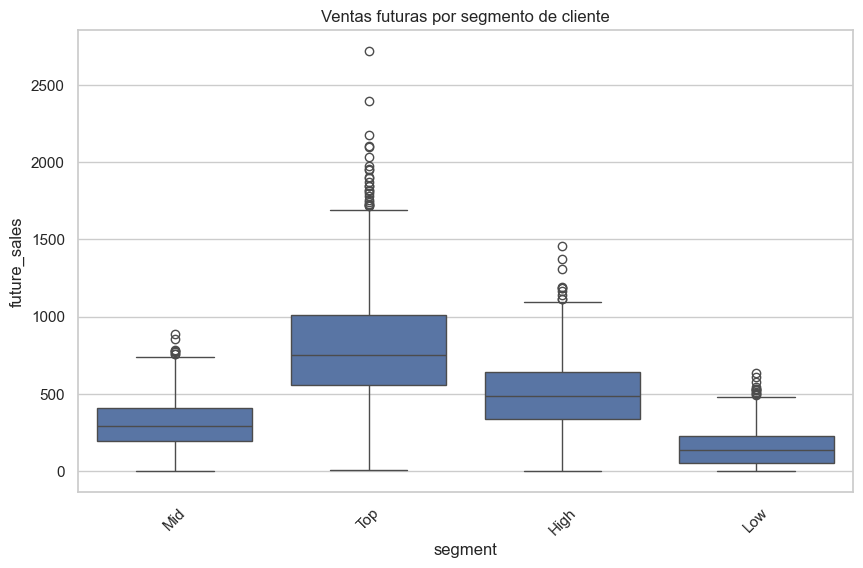

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="segment", y="future_sales")
plt.title("Ventas futuras por segmento de cliente")
plt.xticks(rotation=45)
plt.show()


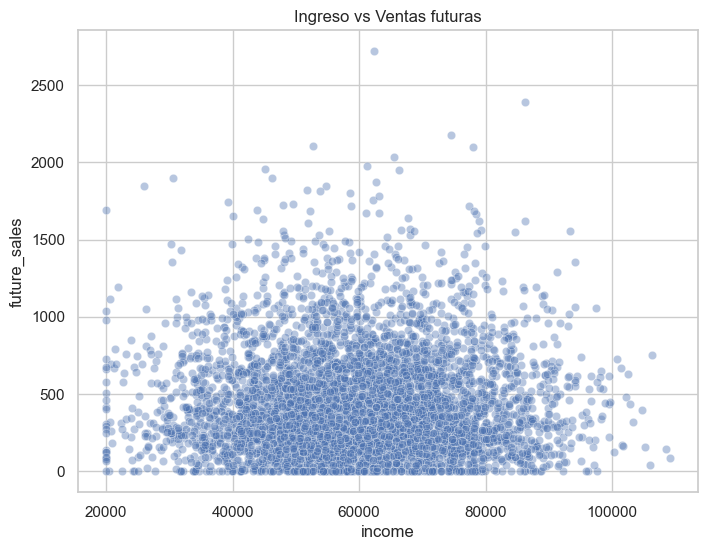

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="income", y="future_sales", alpha=0.4)
plt.title("Ingreso vs Ventas futuras")
plt.show()


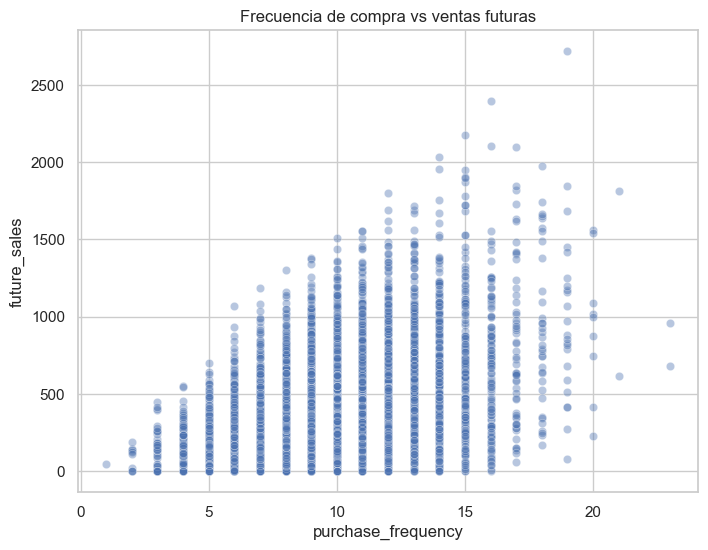

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="purchase_frequency", y="future_sales", alpha=0.4)
plt.title("Frecuencia de compra vs ventas futuras")
plt.show()


## Hallazgos preliminares

1. Las ventas futuras presentan una distribución sesgada hacia valores bajos,
   con pocos clientes de alto valor.

2. La frecuencia de compra muestra relación positiva con ventas futuras.

3. Algunos segmentos presentan mayor potencial de ventas.

Estos resultados indican oportunidades para:
- estrategias de retención,
- campañas segmentadas,
- modelos predictivos de valor de cliente.
